# CNN 모델 학습 시각화
* 학습된 특성 정보를 사람이 이해하기 쉬운 형태로 제시하기 어려워 딥러닝 모델은 '블랙 박스'라는 의견이 존재
* CNN 모델은 다른 딥러닝 모델과는 다르게 시각 데이터의 특징을 학습하기 때문에 비교적 쉽게 시각화 가능
* CNN 모델의 은닉층의 출력(중간 층에 있는 활성화)을 시각화 하여 CNN 모델 내 필터의 의미를 파악하는 데 도움

* 어떤 입력이 주어졌을 때 네트워크에 있는 여러 합성곱과 풀링 층이 출력하는 feature map을 그리는 것
* 층의 출력이 활성화 함수의 출력이라서 종종 활성화 라고 부름
* 네트워크에 의해 학습된 필터들이 어떻게 입력을 분해하는지 보여줌
* 너비, 높이, 깊이 3개의 차원에 대해 feature map을 시가화하는 것이 좋음


## 모델 로딩

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small_augmentation.h5')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## 이미지 로딩

In [9]:
img_path = '/content/gdrive/My Drive/Colab Notebooks/CNN/datasets/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [10]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
print(img_tensor.ndim)
print(img_tensor)

(150, 150, 3)
3
[[[164. 174. 186.]
  [161. 171. 183.]
  [159. 171. 185.]
  ...
  [198. 214. 240.]
  [200. 216. 242.]
  [200. 216. 242.]]

 [[160. 170. 182.]
  [157. 167. 179.]
  [156. 168. 182.]
  ...
  [199. 215. 241.]
  [201. 217. 243.]
  [201. 217. 243.]]

 [[161. 171. 183.]
  [159. 169. 181.]
  [158. 170. 184.]
  ...
  [199. 215. 241.]
  [199. 215. 241.]
  [199. 215. 241.]]

 ...

 [[ 66.  50.  53.]
  [ 54.  37.  43.]
  [ 31.  16.  23.]
  ...
  [214. 192. 179.]
  [194. 177. 149.]
  [193. 176. 148.]]

 [[ 69.  50.  52.]
  [ 58.  42.  45.]
  [ 45.  28.  36.]
  ...
  [218. 199. 185.]
  [210. 192. 168.]
  [199. 181. 157.]]

 [[ 62.  44.  42.]
  [ 56.  38.  38.]
  [ 43.  26.  32.]
  ...
  [210. 193. 175.]
  [209. 193. 170.]
  [197. 181. 158.]]]


In [11]:
img_tensor = np.expand_dims(img_tensor, axis = 0)

img_tensor /= 255

print(img_tensor.shape)

(1, 150, 150, 3)


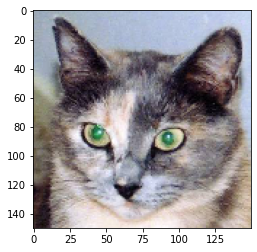

In [13]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

## 입, 출력 텐서 리스트로 모델 객체 만들기
* feature map을 추출하기 위해 모든 층의 활성화를 출력하는 케라스 모델을 만드는 것이 목표
* Model 클래스를 사용
* Model 2개의 매개변수 필요(inputs=, output=)
* 입력텐서(또는 리스트), 출력텐서(또는 리스트)


In [14]:
model.layers

In [15]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 150, 150, 3) dtype=float32>

In [16]:
# 출력층의 아웃풋
model.output

<tf.Tensor 'dense_1/Sigmoid:0' shape=(None, 1) dtype=float32>

In [22]:
# 각 층의 아웃풋
for l in model.layers:
    print(l.output)

Tensor("conv2d/Relu:0", shape=(None, 148, 148, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(None, 74, 74, 32), dtype=float32)
Tensor("conv2d_1/Relu:0", shape=(None, 72, 72, 64), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(None, 36, 36, 64), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(None, 34, 34, 128), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(None, 17, 17, 128), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(None, 15, 15, 128), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(None, 7, 7, 128), dtype=float32)
Tensor("flatten/Reshape_2:0", shape=(None, 6272), dtype=float32)
Tensor("dropout/cond/Identity:0", shape=(None, 6272), dtype=float32)
Tensor("dense/Relu:0", shape=(None, 512), dtype=float32)
Tensor("dense_1/Sigmoid:0", shape=(None, 1), dtype=float32)


In [24]:
from tensorflow.keras import models

# 출력층 추출
layer_outputs = [layer.output for layer in model.layers[:8]]
layer_outputs

[<tf.Tensor 'conv2d/Relu:0' shape=(None, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(None, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(None, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 7, 7, 128) dtype=float32>]

In [25]:
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)
activation_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)      

In [26]:
len(layer_outputs)

8

In [28]:
layer_outputs[0].shape

TensorShape([None, 148, 148, 32])

## 예측 모드로 모델 실행하기

In [29]:
activations = activation_model.predict(img_tensor)

In [33]:
print(type(activations))
print(len(activations))

<class 'list'>
8


In [35]:
# 고양이 이미지에 대한 첫번째 홥성곱 층의 활성화 값

first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


In [39]:
first_layer_activation[0,:,:,0]

array([[0.24380185, 0.24735533, 0.22419582, ..., 0.29464632, 0.2931601 ,
        0.29434496],
       [0.23741393, 0.24108835, 0.22605307, ..., 0.29778895, 0.29293153,
        0.29311574],
       [0.24307208, 0.25044256, 0.22901316, ..., 0.29449818, 0.2921153 ,
        0.2928194 ],
       ...,
       [0.03682803, 0.03313162, 0.04038487, ..., 0.3306466 , 0.30922323,
        0.3165729 ],
       [0.04563502, 0.0589528 , 0.05027378, ..., 0.35711098, 0.3375003 ,
        0.3291266 ],
       [0.04563358, 0.041401  , 0.03514685, ..., 0.34781873, 0.32832727,
        0.32582328]], dtype=float32)

## 시각화

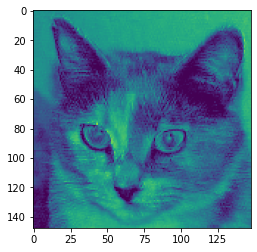

In [49]:
import matplotlib.pyplot as plt

plt.imshow(first_layer_activation[0,:,:,30], cmap='viridis') # viridis = 녹색

In [62]:
activations[0].shape

(1, 148, 148, 32)

In [65]:
# 피처 맵의 개수
activations[0].shape[-1]

32

In [68]:
# 피처 맵의 사이즈
activations[0].shape[-2]

148

In [81]:
layer_names = [layer.name for layer in model.layers[:8]]
print(layer_names)

# 한 줄에 16개씩 시각화
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    print('n_features = ',n_features)

    # 피처맵의 크기
    size = layer_activation.shape[1]
    print('size = ', size)

    # 피처맵을 위한 그리드 크기를 구한다
    n_cols = n_features // images_per_row   #  예. 32//16 -> 2
    display_grid = np.zeros((size*n_cols, images_per_row*size))  # 148*2줄, 16*148
    print(display_grid.shape)

    # 피처맵 위치
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:, col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
        
    scale = 1./size
    plt.figure(figsize = (scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

Output hidden; open in https://colab.research.google.com to view.